# Contextual affix CRF fine-grained experiments analysis

In [1]:
from collections import defaultdict
from pprint import pprint
import os

from pymongo import MongoClient
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('ggplot')

%matplotlib inline

In [2]:
client = MongoClient(os.environ['SACRED_MONGO_URL'])
db = client[os.environ['SACRED_DB_NAME']]

## Best configuration

In [3]:
def get_data(run_criteria):
    if 'status' not in run_criteria:
        run_criteria['status'] = 'COMPLETED'

    data = defaultdict(list)
    for run in db.runs.find(run_criteria):
        data['run_id'].append(run['_id'])

        for conf in ['c2', 'window']:
            data[conf].append(run['config'][conf])

        metric_name = 'f1'
        metric = db.metrics.find_one({'run_id': run['_id'], 'name': metric_name})
        assert metric is not None
        if len(metric['values']) != 1:
            print(f"run {run['_id']} metric {metric_name} has length != 1, taking the last one")
        data[metric_name].append(metric['values'][-1])
    return data

### Fold 1

In [4]:
db.runs.count({
    'experiment.name': 'id-pos-tagging-ctx-affix-crf-fine',
    'meta.command': 'evaluate',
    'config.eval.which': 'dev',
    'config.corpus.dev': {'$regex': r'01.tsv$'},
})

100

In [5]:
run_criteria = {
    'experiment.name': 'id-pos-tagging-ctx-affix-crf-fine',
    'meta.command': 'evaluate',
    'config.eval.which': 'dev',
    'config.corpus.dev': {'$regex': r'01.tsv$'},
}

In [6]:
df = pd.DataFrame(get_data(run_criteria))
len(df)

100

In [7]:
df.head()

,c2,f1,run_id,window
0,0.551026,0.957456,949,0
1,0.001190,0.953417,955,2
2,0.454234,0.949985,969,4
3,0.536143,0.952838,977,3
4,0.002990,0.952466,983,2


In [8]:
df.iloc[df['f1'].idxmax()]

c2           0.002308
f1           0.962245
run_id    1283.000000
window       0.000000
Name: 39, dtype: float64

### Fold 2

In [9]:
run_criteria = {
    'experiment.name': 'id-pos-tagging-ctx-affix-crf-fine',
    'meta.command': 'evaluate',
    'config.eval.which': 'dev',
    'config.corpus.dev': {'$regex': r'02.tsv$'},
}

In [10]:
df = pd.DataFrame(get_data(run_criteria))
len(df)

100

In [11]:
df.head()

,c2,f1,run_id,window
0,0.465492,0.945487,963,5
1,0.051220,0.962369,967,0
2,0.046168,0.949133,975,4
3,0.164513,0.953164,985,3
4,0.115748,0.947478,997,4


In [12]:
df.iloc[df['f1'].idxmax()]

c2           0.117544
f1           0.963621
run_id    1337.000000
window       0.000000
Name: 40, dtype: float64

### Fold 3

In [13]:
run_criteria = {
    'experiment.name': 'id-pos-tagging-ctx-affix-crf-fine',
    'meta.command': 'evaluate',
    'config.eval.which': 'dev',
    'config.corpus.dev': {'$regex': r'03.tsv$'},
}

In [14]:
df = pd.DataFrame(get_data(run_criteria))
len(df)

100

In [15]:
df.head()

,c2,f1,run_id,window
0,0.140225,0.951393,957,3
1,0.002262,0.944767,971,4
2,0.609434,0.942231,987,5
3,0.001640,0.954122,993,1
4,0.247442,0.946650,1007,4


In [16]:
df.iloc[df['f1'].idxmax()]

c2           0.004449
f1           0.959272
run_id    1782.000000
window       0.000000
Name: 93, dtype: float64

### Fold 4

In [17]:
run_criteria = {
    'experiment.name': 'id-pos-tagging-ctx-affix-crf-fine',
    'meta.command': 'evaluate',
    'config.eval.which': 'dev',
    'config.corpus.dev': {'$regex': r'04.tsv$'},
}

In [18]:
df = pd.DataFrame(get_data(run_criteria))
len(df)

100

In [19]:
df.head()

,c2,f1,run_id,window
0,0.095554,0.960728,951,0
1,0.028198,0.955784,959,2
2,0.013370,0.958706,961,1
3,0.143893,0.949875,973,4
4,0.002820,0.957246,981,1


In [20]:
df.iloc[df['f1'].idxmax()]

c2          0.262368
f1          0.961541
run_id    988.000000
window      1.000000
Name: 5, dtype: float64

### Fold 5

In [21]:
run_criteria = {
    'experiment.name': 'id-pos-tagging-ctx-affix-crf-fine',
    'meta.command': 'evaluate',
    'config.eval.which': 'dev',
    'config.corpus.dev': {'$regex': r'05.tsv$'},
}

In [22]:
df = pd.DataFrame(get_data(run_criteria))
len(df)

100

In [23]:
df.head()

,c2,f1,run_id,window
0,0.005975,0.955607,953,2
1,0.002854,0.949872,965,3
2,0.483991,0.950352,979,4
3,0.143530,0.958092,991,2
4,0.381499,0.945604,1005,5


In [24]:
df.iloc[df['f1'].idxmax()]

c2           0.186025
f1           0.962715
run_id    1685.000000
window       1.000000
Name: 79, dtype: float64

## Features analysis

In [25]:
data = defaultdict(list)
for fold in range(1, 6):
    run_criteria = {
        'experiment.name': 'id-pos-tagging-ctx-affix-crf-fine',
        'meta.command': 'evaluate',
        'config.eval.which': 'dev',
        'config.corpus.dev': {'$regex': f'{fold:02}.tsv$'},
    }
    fold_data = get_data(run_criteria)
    fold_data['fold'] = [fold] * len(fold_data['run_id'])
    for key, val in fold_data.items():
        data[key].extend(val)

In [26]:
df = pd.DataFrame(data)
len(df)

500

In [27]:
df.head()

,c2,f1,fold,run_id,window
0,0.551026,0.957456,1,949,0
1,0.001190,0.953417,1,955,2
2,0.454234,0.949985,1,969,4
3,0.536143,0.952838,1,977,3
4,0.002990,0.952466,1,983,2


In [28]:
df[df.fold == 2].head()

,c2,f1,fold,run_id,window
100,0.465492,0.945487,2,963,5
101,0.051220,0.962369,2,967,0
102,0.046168,0.949133,2,975,4
103,0.164513,0.953164,2,985,3
104,0.115748,0.947478,2,997,4


### Multinomial features

#### window

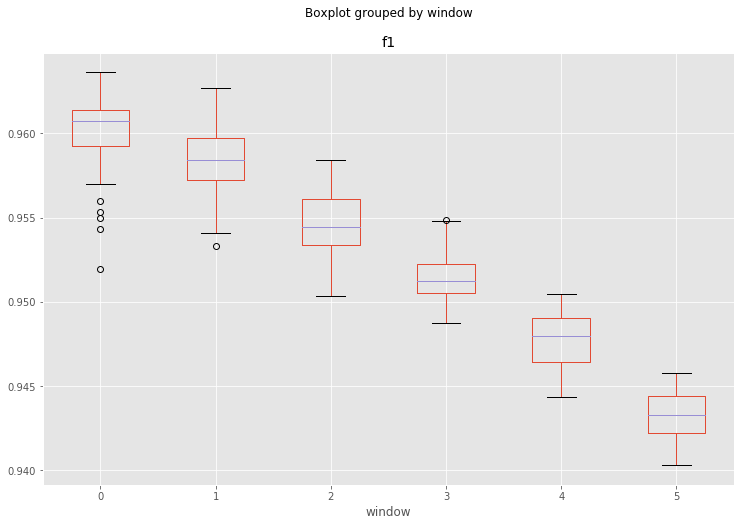

In [29]:
df.boxplot(column='f1', by='window', figsize=(12, 8))

It seems performance decreases as we incorporate more context. This is surprising because we expect context to help, although too much context can be detrimental.

### Continuous features

#### c2

In [30]:
df['log10_c2'] = np.log10(df.c2)

In [31]:
df.head()

,c2,f1,fold,run_id,window,log10_c2
0,0.551026,0.957456,1,949,0,-0.258828
1,0.001190,0.953417,1,955,2,-2.924389
2,0.454234,0.949985,1,969,4,-0.342720
3,0.536143,0.952838,1,977,3,-0.270720
4,0.002990,0.952466,1,983,2,-2.524393


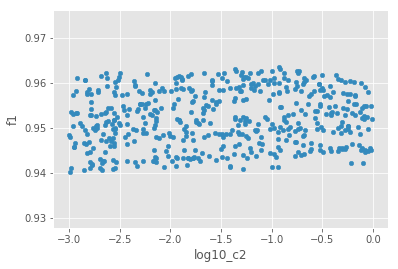

In [32]:
df.plot.scatter(x='log10_c2', y='f1')

It seems that there is no correlation between the L2 coefficient `c2` and performance.